# Random Numbers Generators
### Kirill Zakharov

### Middle squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
def gen1(r, s, n):
    r0 = r
    r1 = 0
    str_r1 = ''
    
    rand_array = [r0/int(str(1).ljust(n + 1, '0'))]
    for i in range(s):
        r1 = r0**2
        if len(str(r1)) < 2*n:
            r0 = int(str(r1).zfill(2*n)[n//2:-n//2])
        else:
            r0 = int(str(r1)[n//2:-n//2])
            
        rand_array.append(r0/int(str(1).ljust(n + 1, '0')))
        
    return rand_array    

In [11]:
r0 = 161512123123121
res1 = gen1(r0, 10000, len(str(r0)))

#### Histogram

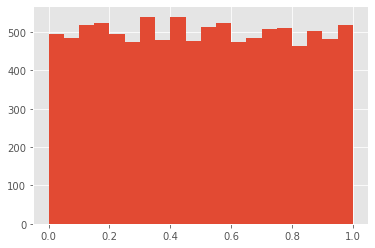

In [12]:
plt.hist(np.array(res1), bins=20)
plt.show()

In [13]:
def period(r0, array):
    for i in range(1, len(array)):
        if r0 == array[i]:
            return i
            break

In [14]:
period(r0/int(str(1).ljust(len(str(r0)) + 1, '0')), res1)

### Linear Congruent method

In [15]:
def gen_LG(r, s, k, b, m):
    r0 = r
    
    rand_array = [r0/m]
    for i in range(s):
        r0 = (k*r0 + b)%m
            
        rand_array.append(r0/m)
        
    return rand_array

### [0;1]

In [16]:
r0 = 16
m = 134456
res2 = gen_LG(r0, 1000000, 8121, 28411, m)
res2[:10]

[0.00011899803653239721,
 0.17768638067471887,
 0.20240078538704112,
 0.9080814541560064,
 0.7407925269233058,
 0.18741447016124235,
 0.20421550544416017,
 0.6454230380198727,
 0.6917950853810912,
 0.2791917058368537]

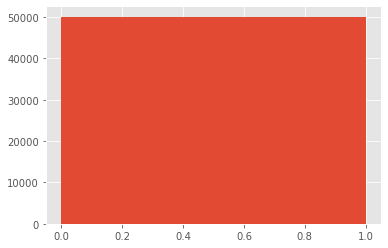

In [17]:
plt.hist(np.array(res2), bins=20)
plt.show()

In [18]:
period(r0/m, res2)

134456

### [a;c]

In [19]:
def gen_LG_ac(r, s, k, b, m, a, c):
    r0 = r
    
    rand_array = []
    for i in range(s):
        r0 = (k*r0 + b)%m
            
        rand_array.append(r0/m *(c-a) + a)
        
    return rand_array

In [20]:
a = 2
c = 6

res3 = gen_LG_ac(26, 100000, 8121, 28411, m, a, c)
res3[:10]

[5.12670315939787,
 2.8015707740822275,
 4.401469625751175,
 5.1800440292735175,
 3.9827750342119357,
 4.961266139108705,
 3.287529005771405,
 2.8682691735586365,
 2.0591717736657347,
 3.3791872434104837]

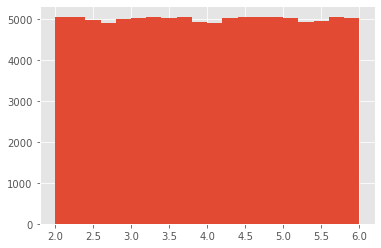

In [21]:
plt.hist(np.array(res3), bins=20)
plt.show()

In [22]:
period(r0/m * (c-a) + a, res3)

72937

### Exponential distribution

In [23]:
def gen_Exp(lmd, s):
    
    rand_array = []
    
    for i in range(s):
        rand_array.append(- np.log(np.random.random())/lmd)
        
    return rand_array

In [24]:
lmd = 2
res4 = gen_Exp(lmd, 10000)
res4[:10]

[0.3920895617097593,
 0.6024472373951134,
 0.12299590726958858,
 0.6247044956453391,
 0.06293359466458519,
 0.1533012138108534,
 0.08508474394375891,
 0.24891107123387482,
 0.175165927996419,
 0.48021081349217504]

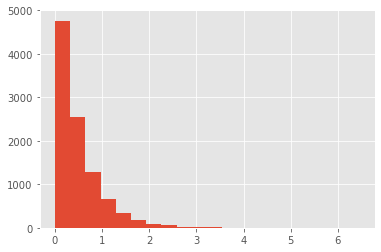

In [25]:
plt.hist(res4, bins=20)
plt.show()

In [26]:
res4 = np.array(res4)
print(f'E ~ {res4.mean()}, E = {1/lmd}')

E ~ 0.4960768232277308, E = 0.5


In [27]:
print(f'D ~ {res4.var()}, D = {1/lmd**2}')

D ~ 0.2520669137284914, D = 0.25


### Triangular Distribution

In [28]:
def gen_Tr(a, c, b, s):
    
    rand_array = []
    
    for i in range(s):
        val1 = np.sqrt(np.random.random() * (b-a)*(c-a)) + a
        if val1 <= c:
            rand_array.append(val1)
    
    for i in range(s):
        val = b - np.sqrt((1-np.random.random()) * (b-a)*(b-c))
        if val >= c:
            rand_array.append(val)
        
    return rand_array

In [29]:
a = 0
c = 5
b = 10

res5 = gen_Tr(a, c, b, 10000)
res5[:10]

[2.030033809982349,
 1.3265864335644872,
 4.1600305086241285,
 4.3947601785258135,
 2.048540102229754,
 3.301235709965401,
 4.032515103212114,
 3.2873178354345884,
 4.333089440909331,
 4.5351616303310145]

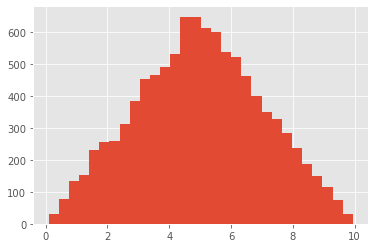

In [30]:
plt.hist(res5[:], bins=30)
plt.show()

In [31]:
res5 = np.array(res5)
print(f'E ~ {res5.mean()}, E = {(a+b+c)/3}')

E ~ 4.981972774317043, E = 5.0


In [32]:
print(f'D ~ {res5.var()}, D = {(a**2 + b**2 + c**2 - a*b - a*c - b*c)/18}')

D ~ 4.1392957727455775, D = 4.166666666666667


### Normal Distribution

In [33]:
#Box-Mullers' transform

def gen_ND(s):
    rand_array = []
    for i in range(s):
        z1 = np.cos(2*np.pi * np.random.random()) * np.sqrt(-2*np.log(np.random.random()))
        z2 = np.sin(2*np.pi * np.random.random()) * np.sqrt(-2*np.log(np.random.random()))
        
        rand_array.append(z1)
        rand_array.append(z2)
        
    return rand_array

In [34]:
res6 = gen_ND(100000)
res6[:10]

[-0.3295038102081873,
 -1.5189434605754666,
 -1.4240565460953427,
 0.5424235610346859,
 0.01239055902218901,
 -0.6427512997053858,
 0.015435923840203293,
 -0.7408431918544157,
 0.24167350349170108,
 -0.9600432924107942]

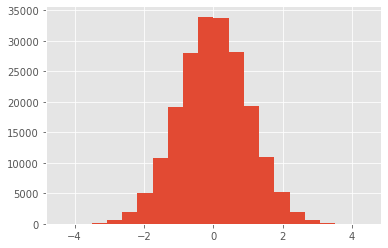

In [35]:
plt.hist(res6, bins=20)
plt.show()

In [36]:
print(f'E = {np.array(res6).mean()}\nD = {np.array(res6).var()}')

E = 0.003582974215681419
D = 1.0018371327500426


In [46]:
#By Central Limit Theorem

def gen_ND_CLT(s, n):
    rand_array = []
    
    for i in range(s):
        rand_array.append(np.sqrt(12/n)*(np.sum(np.random.uniform(0, 1, n))-n/2))
    
    return rand_array

In [58]:
res7 = gen_ND_CLT(100000, 20)
res7[:10]

[0.005574993403991048,
 -0.6940590907301492,
 1.6582133116426045,
 -1.3571075812178977,
 1.169574242043082,
 0.01679926631144038,
 -0.5333911786557645,
 -1.2343890638528972,
 0.22491117244218745,
 1.1508664034229232]

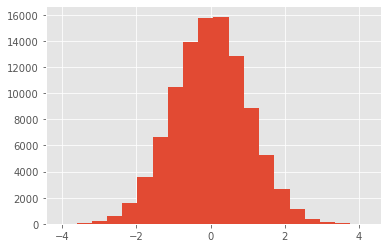

In [59]:
plt.hist(res7, bins=20)
plt.show()

In [55]:
print(f'E = {np.array(res7).mean()}\nD = {np.array(res7).var()}')

E = -0.0037242140367053154
D = 1.0006442530707278


## Calculating Integral by Monte-Carlo method

In [60]:
def integral(n, points, f):
    n1 = 0
    for point in points:
        if point[1] < f(point[0]):
            n1 += 1
            
    return n1/n        

In [61]:
n = 1000
points = np.random.rand(n, 2)

integral(n, points, lambda x: np.sin(np.pi*x))

0.651

In [62]:
array_test = []
for i in range(1000):
    n = 1000
    points = np.random.rand(n, 2)

    array_test.append(integral(n, points, lambda x: np.sin(np.pi*x)))

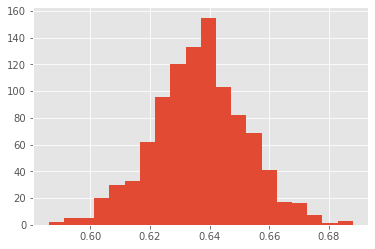

In [63]:
plt.hist(array_test, bins=20)
plt.show()

In [64]:
mean = np.array(array_test).mean()
mean

0.636477

In [65]:
array_test2 = []
n = 10000
for i in range(2, 10000):
    points = np.random.rand(i, 2)
    
    array_test2.append(integral(i, points, lambda x: np.sin(np.pi*x)))

In [66]:
eps = abs(np.array(array_test2) - mean)

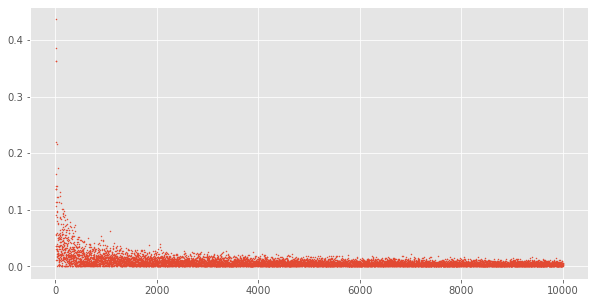

In [67]:
plt.subplots(figsize=(10, 5))
plt.scatter(np.arange(2, 10000), eps, s=1)
plt.show()

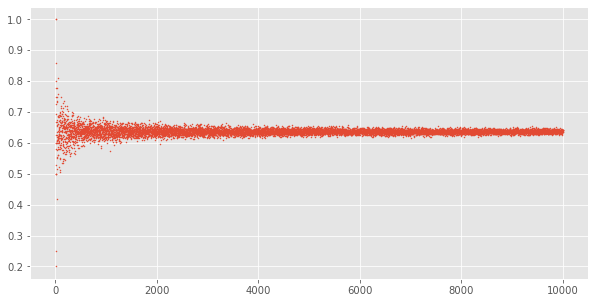

In [68]:
plt.subplots(figsize=(10, 5))
plt.scatter(np.arange(2, 10000), array_test2, s=1)
plt.show()